# Introduction
Taking a look at some heart data collected across 3 countries in the 80s. The dataset is from UCI's ML Respository and looks at predictors of heart disease.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
data = pd.read_csv("heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Let's see what some of these columns are storing. The names aren't very informative so I'll look at the documenation on the repo.

- Age is measured in years
- Sex is coded as 1 == male and 0 == female

- cp is Chest Pain type and is scored as 1, 2, 3, or 4
 - **What is angina pectoris?**
   - Temporary chest pain or discomfort. It's generally caused by a lack of oxygen or blood supply to heart muscle.
   - Coronary Artery disease via atherosclerosis is a very common cause if not the most common cause. Basically fatty plaques occlude the blood vessels supplying the heart.
 - 0 == Typical(stable) angina
   - Angina that's caused by physical or emotional exertion.
 - 1 == Atypical(unstable) angina
   - Angina that occurs without any precipitants. I.e. occurs at rest.
 - 2 == Non-cardiac cause
   - Things like Gastroesophageal Reflux Disease (GERD), pulmonary embolism, and musculoskeletal probelms can cause very similar problems. GERD can easily be confused with angina.
 - 3 == Asymptomatic
   - I have to assume that this means the person doesn't experience chest pain. I can't imagine what else they mean by asymptomatic; chest pain isn't a diagnosis in which you can be asymptomatic.

- trestbps is the resting blood pressure of the patient on admission to hospital.
- chol is serum cholesterol in mg/dL.

- fbs is a binary based on fasting blood sugar. 1 means that the value was > 120 mg/dL and 0 means that it was < 120 mg/dL.
- restecg, oldpeak, and slope refer to the ST segment of the Electrocardiogram (ECG). See the image in the cell below
  - restecg is the resting ECG
    - 0 == Normal
    - 1 == ST segment or T wave abnormality
     - The ST segment might become elevated or depressed
     - The T wave could become inverted
    - 2 == Showing probable or definite left ventricular hypertrophy.

  - slope (of ST segment during peak exercise)
    - 0 == Upsloping
    - 1 == flat
    - 2 == downsloping

  - oldpeak
    - ST depression relative to rest induced by exercise

- thalach is the maximum heart rate achieved during an exercise test.

- exang is 1 if exercise induces the angina and 0 if exercise doesn't induce angina.

- ca is the number of coronary blood vessels coloured during fluoroscopy.
 - I'm currently assuming the coloured in vessels are vessels with blockages.

- thal is not explained in the original repository either.
 - 0 == normal
 - 1 == fixed defect
 - 2 == reversible defect
 - I have no idea what this column is referencing and the explanation of the scoring doesn't help much either.

- target is a binary. It's whether or not a person has heart disease but specifically refers to vessel narrowing.
 - 0 == Less than a 50% diameter narrowing
 - 1 == More than a 50% diameter narrowing
 - I don't know which arteries in particular are being referenced.

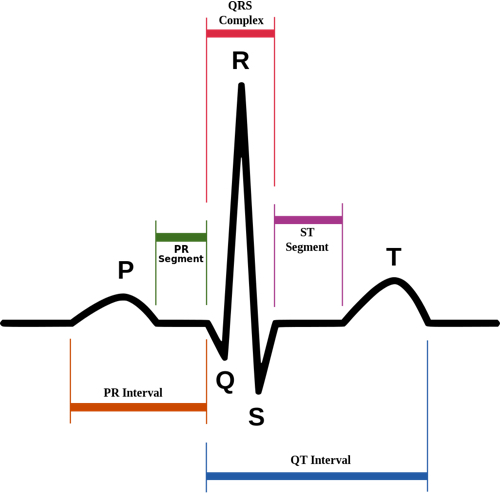

In [8]:
from IPython.display import Image
Image(filename = "ECG.jpg", width = 300, height = 200)

I'm going to take a closer look at the unique values of all the columns without continuous data to make sure they line up with the values the dataset repository mentioned.

In [13]:
categorical = ["sex", "cp", "fbs", "restecg", "slope", "oldpeak",
            "exang", "ca", "thal", "target"]

for col in categorical:
    print(col, data[col].unique())

sex [1 0]
cp [0 1 2 3]
fbs [0 1]
restecg [1 0 2]
slope [2 0 1]
oldpeak [1.  3.1 2.6 0.  1.9 4.4 0.8 3.2 1.6 3.  0.7 4.2 1.5 2.2 1.1 0.3 0.4 0.6
 3.4 2.8 1.2 2.9 3.6 1.4 0.2 2.  5.6 0.9 1.8 6.2 4.  2.5 0.5 0.1 2.1 2.4
 3.8 2.3 1.3 3.5]
exang [0 1]
ca [2 0 1 3 4]
thal [3 2 1 0]
target [0 1]


Most of the columns look fine. I am confused by the thal column. Not only was it not explained, there's now an additional occuring value that doesn't have an explanation.